In [1]:
import read
import matplotlib.pyplot as plt
from CentralStreamingModel.projection import generating_moments
from scipy.integrate import simps
import numpy as np
import moments2model
from scipy.interpolate import interp1d
from scipy.stats import norm
import seaborn as sns
import CentralStreamingModel.integral.real2redshift as integrate
sns.set_context('talk')
import importlib
from halotools.mock_observables import tpcf_multipole
from scipy.interpolate import RegularGridInterpolator
from CentralStreamingModel.skewt import skewt_moments

In [2]:
%%time 

n_boxes = 5
boxsize = 1024
snapshot = 0
tracer = 'halos'
rm = read.Read_Mean(n_boxes, boxsize, snapshot, tracer = tracer)

/cosma6/data/dp004/dc-cues1/pv_results/halos_b1.txt
/cosma6/data/dp004/dc-cues1/pv_results/halos_b2.txt
/cosma6/data/dp004/dc-cues1/pv_results/halos_b3.txt
/cosma6/data/dp004/dc-cues1/pv_results/halos_b4.txt
/cosma6/data/dp004/dc-cues1/pv_results/halos_b5.txt
CPU times: user 1min 9s, sys: 2.45 s, total: 1min 12s
Wall time: 1min 6s


In [3]:
rm.jointpdf_los.shape

(50, 100, 80)

In [5]:
ex = generating_moments.Expectations(rm.r, rm.v_r, rm.v_t,
                                     rm.jointpdf_rt)

In [6]:
importlib.reload(moments2model)

<module 'moments2model' from '/cosma/home/dp004/dc-cues1/CentralStreamingModel/moments/moments2model.py'>

In [7]:
%%time

measured = moments2model.Model(rm, ex, 'measured')

CPU times: user 3.96 s, sys: 45.2 ms, total: 4.01 s
Wall time: 154 ms


In [8]:
%%time

st = moments2model.Model(rm, ex, 'st')

/cosma/local/pythonconda3/4.5.4/lib/python3.6/site-packages/scipy/optimize/minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/cosma/local/pythonconda3/4.5.4/lib/python3.6/site-packages/scipy/optimize/minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/cosma/home/dp004/dc-cues1/CentralStreamingModel/skewt/skewt_moments.py:8: RuntimeWarning: overflow encountered in double_scalars
  b_dof = (dof/np.pi)**0.5 * gamma(0.5*(dof - 1))/gamma(0.5*dof)
/cosma/home/dp004/dc-cues1/CentralStreamingModel/skewt/skewt_moments.py:16: RuntimeWarning: overflow encountered in double_scalars
  b_dof = (dof/np.pi)**0.5 * gamma(0.5*(dof - 1))/gamma(0.5*dof)


Found params from moments
CPU times: user 33.6 s, sys: 1.02 s, total: 34.6 s
Wall time: 4.58 s


In [9]:
%%time

gaussian = moments2model.Model(rm, ex, 'gaussian')

CPU times: user 37.9 s, sys: 1.12 s, total: 39.1 s
Wall time: 1.64 s


In [10]:
#%%time

#bf_gaussian = moments2model.Model(rm, ex, 'bf-gaussian')



In [11]:
#%%time 

#bf_st = moments2model.Model(rm, ex, 'bf-st')

Text(0.5,0,'$s$ [Mpc/h]')

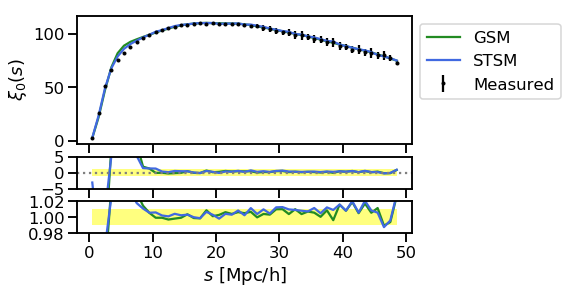

In [12]:
fig, (ax1, ax2,ax3) = plt.subplots(nrows=3,sharex = True, squeeze = True,
                          gridspec_kw = {'height_ratios':[4,1,1]})

ax1.errorbar(rm.s_c, rm.s_c * rm.s_c * rm.mono.mean,
            yerr =  rm.s_c * rm.s_c * rm.mono.std,
            color = 'black', linestyle='',
             label = 'Measured', marker='o',
             markersize=3)


ax1.plot(gaussian.s_c, gaussian.s_c * gaussian.s_c * gaussian.mono,
         color = gaussian.color, label='GSM')

ax1.plot(st.s_c, st.s_c * st.s_c * st.mono,
         color = st.color, label='STSM')


ax1.legend(bbox_to_anchor = (1,1))
ax1.set_ylabel(r'$\xi_0(s)$')


ax2.plot(gaussian.s_c, (gaussian.mono - rm.mono.mean)/rm.mono.std,
        color = gaussian.color )


ax2.plot(st.s_c, (st.mono - rm.mono.mean)/rm.mono.std,
        color = st.color )

ax3.plot(gaussian.s_c, gaussian.mono/ rm.mono.mean,
        color = gaussian.color)



ax3.plot(st.s_c, st.mono/ rm.mono.mean,
        color = st.color)


ax2.axhline(y = 0., color='gray', linestyle='dotted')
ax2.fill_between(st.s_c,-1., 1., facecolor = 'yellow', alpha = 0.5)
ax2.set_ylim(-5.,5)

ax3.fill_between(gaussian.s_c,0.99, 1.01, facecolor = 'yellow', alpha = 0.5)
ax3.set_ylim(0.98,1.02)


ax3.set_xlabel(r'$s$ [Mpc/h]')

Text(0.5,0,'$s$ [Mpc/h]')

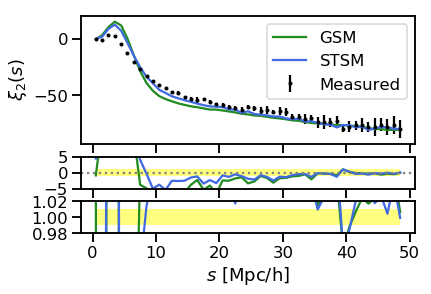

In [13]:
fig, (ax1, ax2,ax3) = plt.subplots(nrows=3,sharex = True, squeeze = True,
                          gridspec_kw = {'height_ratios':[4,1,1]})


ax1.errorbar(rm.s_c, rm.s_c * rm.s_c * rm.quad.mean,
            yerr =  rm.s_c * rm.s_c * rm.quad.std,
            color = 'black', linestyle='',
             label = 'Measured', marker='o',
             markersize=3)



ax1.plot(gaussian.s_c, gaussian.s_c * gaussian.s_c * gaussian.quad,
         color = gaussian.color, label='GSM')



ax1.plot(st.s_c, st.s_c * st.s_c * st.quad,
         color = st.color, label='STSM')#, linestyle='dashed')



ax1.legend(bbox_to_anchor = (1,1))
ax1.set_ylabel(r'$\xi_2(s)$')

ax2.plot(gaussian.s_c, (gaussian.quad - rm.quad.mean)/rm.quad.std,
        color = gaussian.color )




ax2.plot(st.s_c, (st.quad - rm.quad.mean)/rm.quad.std,
        color = st.color )


ax3.plot(gaussian.s_c, gaussian.quad/ rm.quad.mean,
        color = gaussian.color)



ax3.plot(st.s_c, st.quad/ rm.quad.mean,
        color = st.color)


ax2.axhline(y = 0., color='gray', linestyle='dotted')
ax2.fill_between(st.s_c,-1., 1., facecolor = 'yellow', alpha = 0.5)
ax2.set_ylim(-5.,5)

ax3.fill_between(gaussian.s_c,0.99, 1.01, facecolor = 'yellow', alpha = 0.5)
ax3.set_ylim(0.98,1.02)


ax3.set_xlabel(r'$s$ [Mpc/h]')

Text(0.5,0,'$s$ [Mpc/h]')

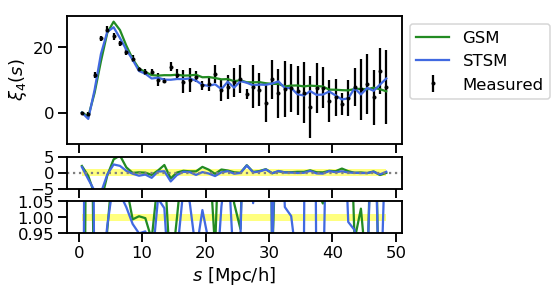

In [14]:
fig, (ax1, ax2,ax3) = plt.subplots(nrows=3,sharex = True, squeeze = True,
                          gridspec_kw = {'height_ratios':[4,1,1]})


ax1.errorbar(rm.s_c, rm.s_c * rm.s_c * rm.hexa.mean,
            yerr =  rm.s_c * rm.s_c * rm.hexa.std,
            color = 'black', linestyle='',
             label = 'Measured', marker='o',
             markersize=3)

ax1.plot(gaussian.s_c, gaussian.s_c * gaussian.s_c * gaussian.hexa,
         color = gaussian.color, label='GSM')


ax1.plot(st.s_c, st.s_c * st.s_c * st.hexa,
         color = st.color, label='STSM')


ax1.legend(bbox_to_anchor = (1,1))
ax1.set_ylabel(r'$\xi_4(s)$')


ax2.plot(gaussian.s_c, (gaussian.hexa - rm.hexa.mean)/rm.hexa.std,
        color = gaussian.color )


ax2.plot(st.s_c, (st.hexa - rm.hexa.mean)/rm.hexa.std,
        color = st.color )

ax3.plot(gaussian.s_c, gaussian.hexa/ rm.hexa.mean,
        color = gaussian.color)



ax3.plot(st.s_c, st.hexa/ rm.hexa.mean,
        color = st.color)


ax2.axhline(y = 0., color='gray', linestyle='dotted')
ax2.fill_between(st.s_c,-1., 1., facecolor = 'yellow', alpha = 0.5)
ax2.set_ylim(-5.,5)

ax3.fill_between(gaussian.s_c,0.99, 1.01, facecolor = 'yellow', alpha = 0.5)
ax3.set_ylim(0.95,1.05)


ax3.set_xlabel(r'$s$ [Mpc/h]')

In [ ]:
rlist1 = [0,5,10,40]
rlist2 = [0,5,10,40]

fig, axes = plt.subplots(nrows=len(rlist2),
                         ncols=len(rlist1),sharex=True,
                         sharey=True, figsize=(20,20))

for i, rperp in enumerate(rlist2):
    for j, rparal in enumerate(rlist1):
        axes[i,j].text(-17,3.5e-1,r'($ r_\perp = %.1f'
                       ', r_\parallel = %.1f)$ Mpc/h'%(gaussian.rm.r_perp[rperp],
                                                       gaussian.rm.r_parallel[rparal]),fontsize=14)
        axes[i,j].errorbar(gaussian.rm.v_los, gaussian.rm.jointpdf_los[rperp,rparal], 
                yerr = gaussian.rm.jointpdf_los_error[rperp,rparal],
                linestyle='', marker='o',
                markersize = 5, color='k', label='Measured')
        
        axes[i,j].plot(gaussian.rm.v_los, gaussian.jointpdf_los[rperp,rparal], 
                linestyle='-',color=gaussian.color, label='Gaussian', linewidth=3)
        
        axes[i,j].plot(gaussian.rm.v_los, bf_gaussian.jointpdf_los[rperp,rparal], 
                linestyle='-',color=bf_gaussian.color, label='Gaussian - BF', linewidth=3)
        axes[i,j].plot(gaussian.rm.v_los, st.jointpdf_los[rperp,rparal], 
                linestyle='-',color=st.color, label='STSM', linewidth=3)
        axes[i,j].plot(gaussian.rm.v_los, bf_st.jointpdf_los[rperp,rparal], 
                linestyle='-',color=bf_st.color, label='STSM - BF', linewidth=3)


        axes[i,j].set_yscale("log", nonposy='clip')

        axes[i,j].set_ylim(1e-6,0.99)
        if j == 0:
            axes[i,j].set_ylabel(r'$\mathcal{P}(v_\parallel | r_\perp, r_\parallel)$ [Mpc/h]$^{-1}$')
            labels = list(axes[i,j].get_yticklabels())
            labels[-1] = ''
            axes[i,j].set_yticklabels(labels)
            
        if i == len(rlist2)-1:
            axes[i,j].set_xlabel(r'$v_\parallel$ [Mpc/h]')
            
        #if i==len(rlist2)-1 and j==0:
        #    axes[i,j].legend()
            
plt.subplots_adjust(wspace=0, hspace=0)
plt.tight_layout()